In [6]:
# import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# read the dataset into a pandas dataframe
loans = pd.read_csv("../data/loan_data.csv")
loans.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [8]:
# summarize dataset info
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [9]:
# describe numerical features
loans.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [10]:
# compare approved(1)/not approved(0) proportions
loans["loan_status"].value_counts(normalize=True).round(2)

loan_status
0    0.78
1    0.22
Name: proportion, dtype: float64

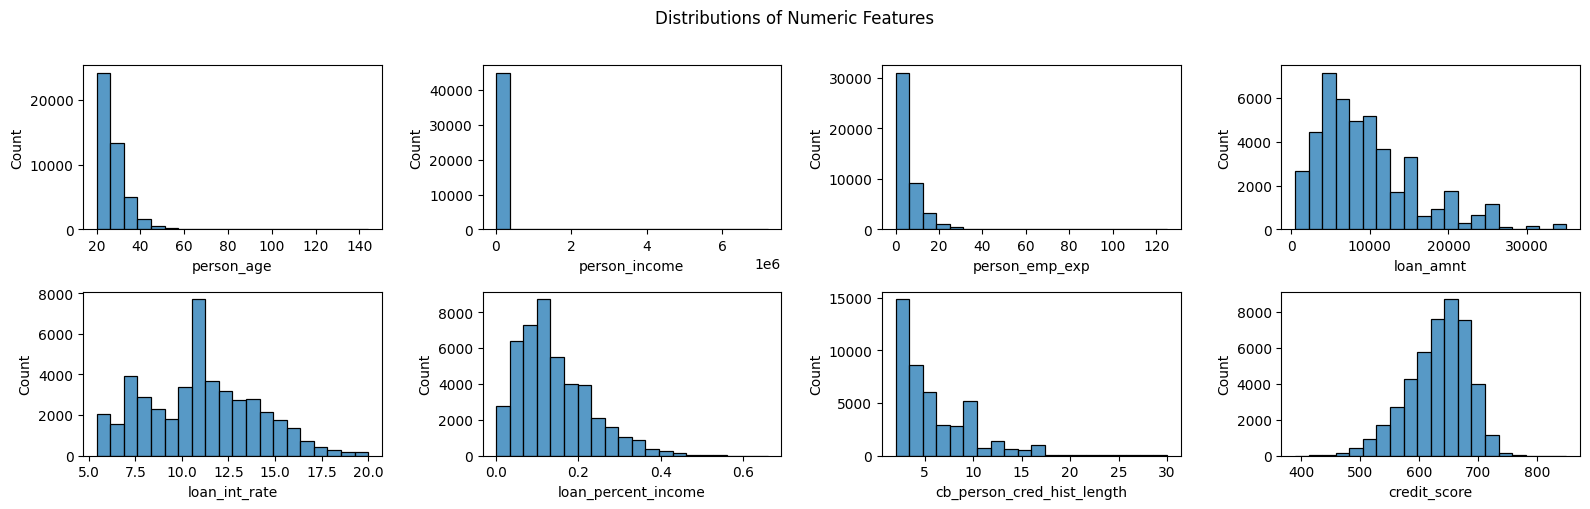

In [11]:
# visualize distributions of numeric features
numerical_features = loans.select_dtypes(exclude="object").columns[:-1]

fig, ax = plt.subplots(2, 4, figsize=(16, 5))
fig.suptitle("Distributions of Numeric Features", y=1.01)
for i, feat in zip(range(0, 8), numerical_features):
    sns.histplot(data=loans, x=feat, bins=20, ax=ax.flatten()[i])
plt.tight_layout()

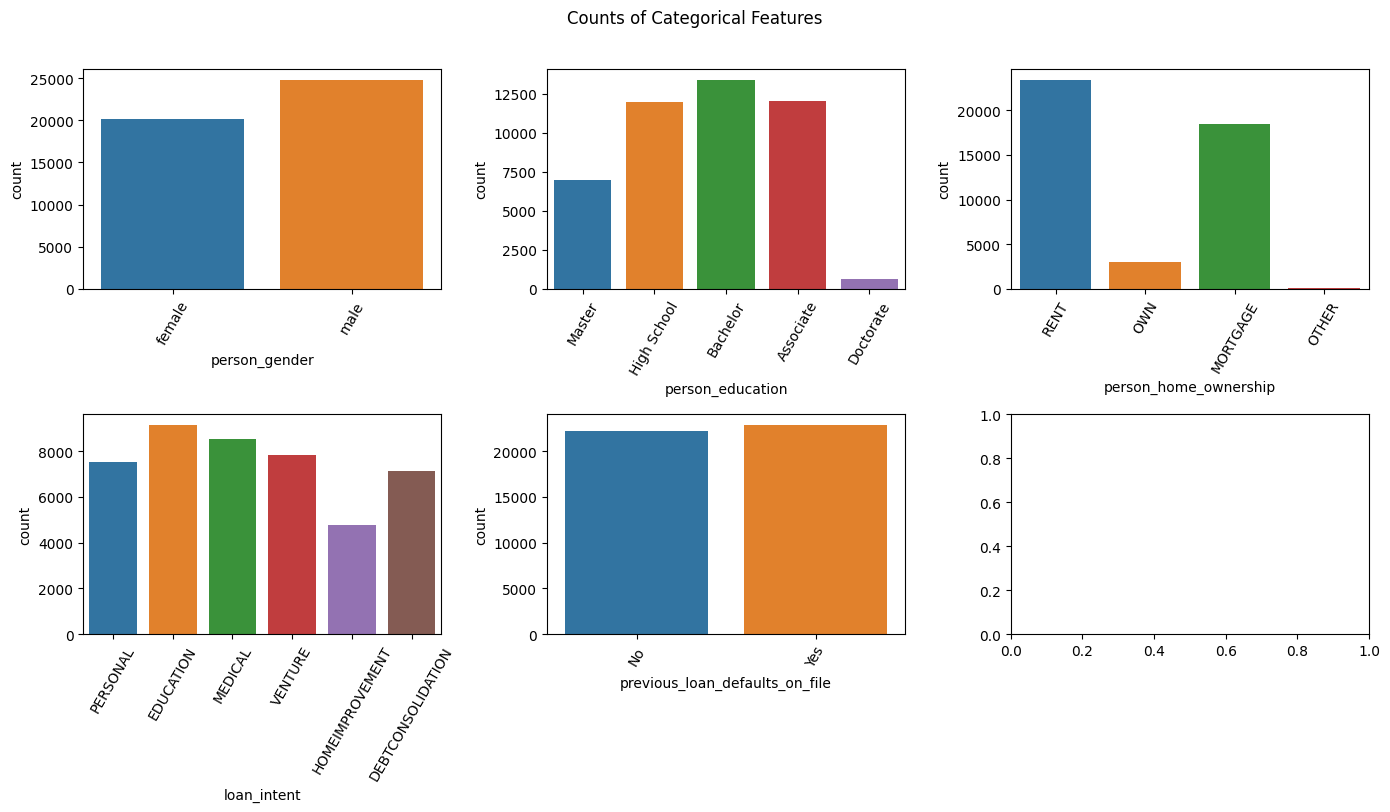

In [12]:
# visualize counts of categorical features
categorical_features = loans.select_dtypes(include="object").columns

fig, ax = plt.subplots(2, 3, figsize=(14, 8))
fig.suptitle("Counts of Categorical Features", y=1.01)
for i, feat in zip(range(0, 5), categorical_features):
    sns.countplot(data=loans, x=feat, hue=feat, ax=ax.flatten()[i])
    ax.flatten()[i].tick_params(axis="x", rotation=60)
plt.tight_layout()

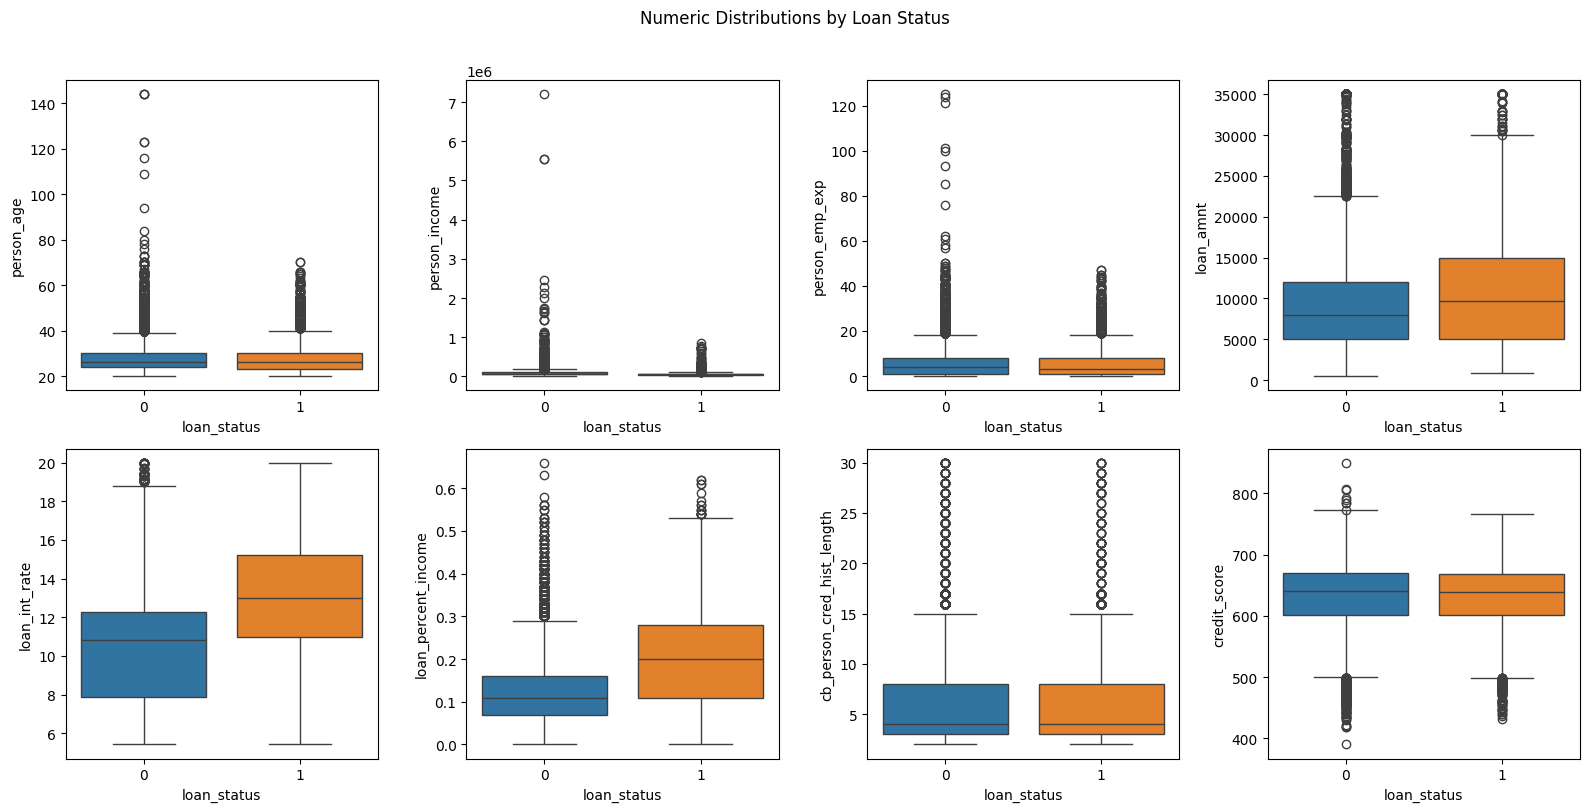

In [13]:
# visualize the distributions of numeric features by loan status
fig, ax = plt.subplots(2, 4, figsize=(16, 8))
plt.suptitle("Numeric Distributions by Loan Status", y=1.01)

for i, feat in zip(range(0, 8), numerical_features):
    sns.boxplot(data=loans, x="loan_status", y=feat, hue="loan_status", legend=False, ax=ax.flatten()[i])
plt.tight_layout()

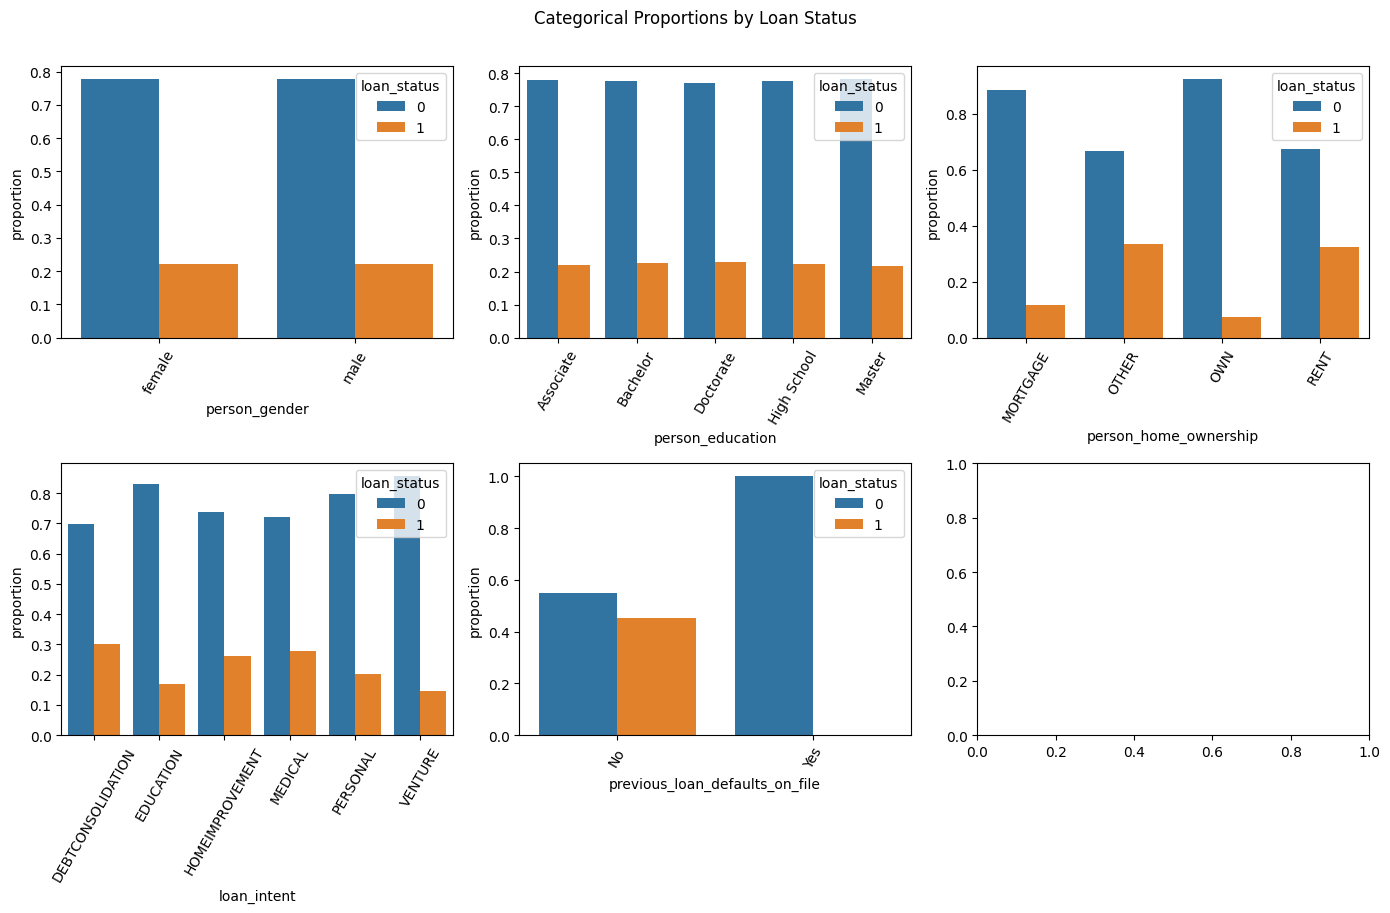

In [14]:
# visualize proportions of categorical features by loan status
fig, ax = plt.subplots(2, 3, figsize=(14, 9))
plt.suptitle("Categorical Proportions by Loan Status", y=1.01)

for i, feat in zip(range(0, 5), categorical_features):
    grouped_data = loans.groupby([feat, "loan_status"]).size().reset_index(name="counts")
    grouped_data["total"] = grouped_data.groupby(feat)["counts"].transform("sum")
    grouped_data["proportion"] = grouped_data["counts"] / grouped_data["total"]
    sns.barplot(data=grouped_data, x=feat, y="proportion", hue="loan_status", ax=ax.flatten()[i])
    ax.flatten()[i].tick_params(axis="x", rotation=60)
    
plt.tight_layout()

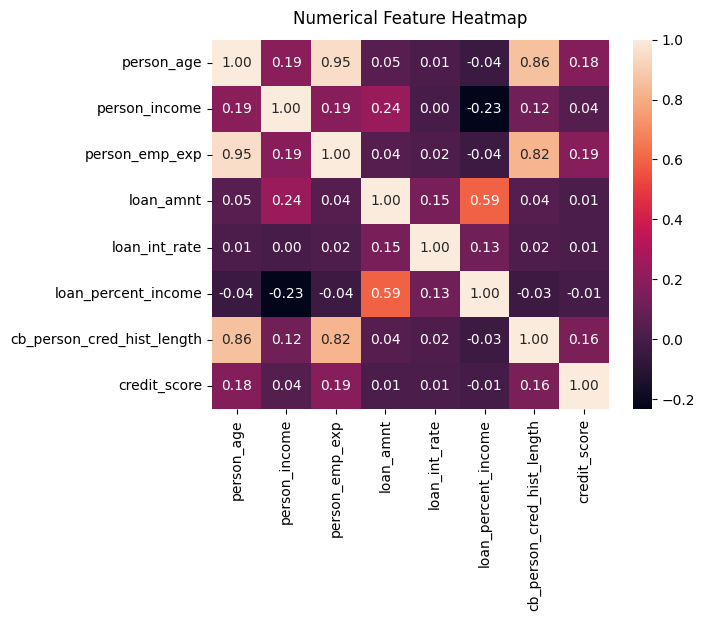

In [15]:
# visualize numeric feature correlations
sns.heatmap(loans[numerical_features].corr(), annot=True, fmt=".2f")
plt.title("Numerical Feature Heatmap", y=1.02);